In [162]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [151]:
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.45, 0.22, 7.5
param, p2 = get_outer_param_2(Lx,Nx,ϕa,ϕp,v0)
f,u,c = load_out_2(Lx,Nx,ϕa,ϕp,v0)
# f,u,c = solve_out_2(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-9)
err, avmag, c = check_u(u,p2);
print("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err)")

ϕa,ϕp=(0.45,0.22): c=0.4856626654363238, avmag=0.28400414300665106, err=2.0330342409558e-9

In [264]:
diffa, diffp = f[indf,1] + f[indf,2] - crita, f[indf,3] - critp

(-0.0005069414664617966, 0.00047760773027205605)

In [ ]:
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.45, 0.2175, 7.5
param, p2 = get_outer_param_2(Lx,Nx,ϕa,ϕp,v0)
# f,u,c = load_out_2(Lx,Nx,ϕa,ϕp,v0)
f,u,c = solve_out_2(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-6)
err, avmag, c = check_u(u,p2);
print("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err)")

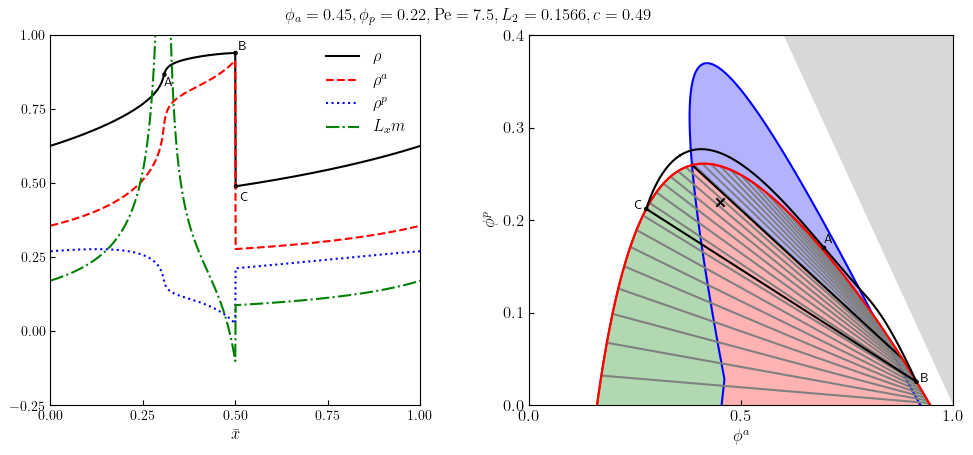

In [446]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f;c=c, point = indf)

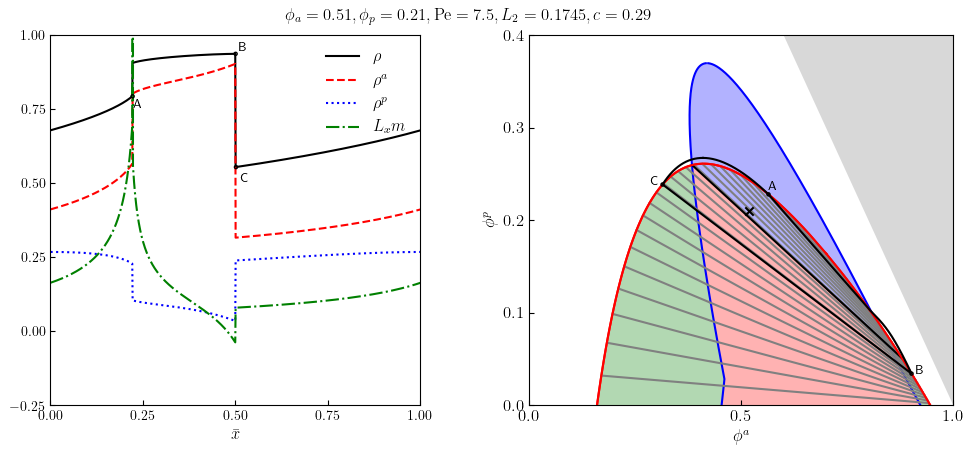

In [ ]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f;c=c,point = ind-Nx÷2)

In [232]:
Lx, Nx, ϕa, ϕp, v0, ind = 100.0, 1024, 0.5, 0.2125, 7.5, 739
param, ps = get_outer_param_4(Lx,Nx,ϕa,ϕp,v0; ind = ind)
f,u,c = load_out_4(Lx,Nx,ϕa,ϕp,v0; ind =ind)
# f,u,c = solve_out_4(Lx,Nx,ϕa,ϕp,v0,u; ind =ind, tol = 1e-8)
err, erri, avmag, c = check_u_4(u,ps);
print("ϕa,ϕp=($(d2(sum(f[:,1:2]))/Nx),$(d2(sum(f)/Nx-sum(f[:,1:2]))/Nx)): c=$(c), avmag=$(avmag), err=$(err),$(erri)")

ϕa,ϕp=(0.5,0.2125): c=0.47231205028727913, avmag=0.27493173442136676, err=4.288835953047965e-11,735

In [391]:
Lx, Nx, ϕa, ϕp, v0, ind = 100.0, 1024, 0.50, 0.2, 7.5, 739
param, ps = get_outer_param_4(Lx,Nx,ϕa,ϕp,v0; ind = ind)
f,u,c = load_out_4(Lx,Nx,ϕa,ϕp,v0; ind =ind)
# f,u,c = solve_out_4(Lx,Nx,ϕa,ϕp,v0,u; ind =ind, tol = 1e-8)
err, erri, avmag, c = check_u_4(u,ps);
print("ϕa,ϕp=($(d2(sum(f[:,1:2])/Nx)),$(d2( sum(f)/Nx-sum(f[:,1:2])/Nx )): c=$(c), avmag=$(avmag), err=$(err),$(erri)")

ϕa,ϕp=(0.53,0.2: c=30124.607321596166, avmag=0.21579197356340665, err=14782.434028934476,2044

In [236]:
gamma =  find_gamma_limit(;Pe = v0, initial_Δ = 1e-7, γ_max = 10.)
phi =  find_rho_limit(;Pe = v0, initial_Δ = 1e-7, γ_max = 10.)
crita, critp = gamma_converter(gamma, phi)
gamma, phi, crita, critp

(2.2104681155594945, 0.8649239, 0.7014185877758741, 0.1635053122241259)

In [445]:
ind = extract_ind(f)
indf = ind - Nx÷2

315

In [550]:
# solver with fixed ends
# ff function 
function ff_out_4_extra(F,u,p; atol = 1e-12)
    DT, v0, DR, _, Nx, _, _, _, ind , ϕaL, ϕaR, ϕL, ϕR = p
    global ρ,ρa,m
    local c
    ρ  = u[(0*Nx+1):1:(1*Nx)]
    ρa = u[(1*Nx+1):1:(2*Nx)]
    c  = u[end]

    for i in 2:(ind-1)
        F[i-1]      = rho_out_eq_2(ρ,ρa,c,i; p = p) - rho_out_eq_2(ρ,ρa,c,1; p = p)
        F[Nx-3+i]   = act_out_eq_2(ρ,ρa,c,i; p = p) - act_out_eq_2(ρ,ρa,c,1; p = p)
    end

    for i in (ind+1):(Nx-1)
        F[i-1]      = rho_out_eq_2(ρ,ρa,c,i; p = p) - rho_out_eq_2(ρ,ρa,c,1; p = p)
        F[Nx-3+i]   = act_out_eq_2(ρ,ρa,c,i; p = p) - act_out_eq_2(ρ,ρa,c,1; p = p)
    end

    ind1 = ind+1
    F[ind-1]   = ρ[ind] - ϕL
    F[Nx-3+ind]= ρ[ind1] - ϕR
    F[2*Nx]    = ρa[ind] - ϕaL
    F[2*Nx+1]  = ρa[ind1] - ϕaR

    γ_end = (-ρa[end].+1)./(-ρ[end].+1)
    γ_srt = (-ρa[1].+1)./(-ρ[1].+1)
    F[2*Nx-3] = gg0.(ρ[end], γ_end; Pe = v0) - gg0.(ρ[1], γ_srt; Pe = v0)
    F[2*Nx-2] = (hhh0.(ρ[end], γ_end; Pe = v0, atol = atol) - hhh0.(ρ[1], γ_srt; Pe = v0, atol = atol))./10
    F[2*Nx-1] = γ_end .- γ_srt
end
# get enpoints
# indf = 739 - Nx÷2
enda, endphi = f[indf,1] + f[indf,2], f[indf,1] + f[indf,2] + f[indf,3]
enda1, endphi1 = f[indf+1,1] + f[indf+1,2], f[indf+1,1] + f[indf+1,2] + f[indf+1,3]
# ep = 1.0
# ϕaL, ϕaR, ϕL, ϕR = (1-ep).*(enda, enda, endphi,endphi) .+ep.*(crita, crita, phi, phi)
ϕaL, ϕaR, ϕL, ϕR = get_BC(2.0,v0;initial_Δ = 1e-6)
ep = 1.0
ϕaL, ϕaR, ϕL, ϕR = (1-ep).*(enda, enda1, endphi,endphi1) .+ep.*(ϕaL, ϕaR, ϕL, ϕR)
# get u0 pe
Lx, Nx, ϕa, ϕp, v0, ind = 100.0, 1024, 0.51, 0.21, 7.5, 739 # 100.0, 1024, 0.45, 0.22, 7.5, 827 # 
indf = ind - Nx÷2
param, ps = get_outer_param_4(Lx,Nx,ϕa,ϕp,v0; ind = ind)
pe = ps..., ϕaL, ϕaR, ϕL, ϕR
# f,u,c = load_out_4(Lx,Nx,ϕa,ϕp,v0; ind =ind)
#
# Check 
F = zeros(2*Nx+1)
        ff_out_4_extra(F,u,pe)
        f = get_out_f(u,param)
        avmag = Lx*sum(f[:,2]-f[:,1])/Nx
        err, erri, avmag, c = maximum(abs.(F)), argmax(abs.(F)), avmag, u[end]
        print("ϕa,ϕp=($(d2(sum(f[:,1:2])/Nx)),$(d2(sum(f)/Nx-sum(f[:,1:2])/Nx)): c=$(c), avmag=$(avmag), err=$(err),$(erri)")
#

ϕa,ϕp=(0.5,0.21: c=0.47231205028727913, avmag=0.27493173442136676, err=0.18208371475938878,2048

In [529]:
# Solve
tol = 1e-8
prob = NonlinearProblem(ff_out_4_extra,u, pe; abstol = tol, reltol =  tol);
sol  = solve(prob)
    u = sol.u
    f = get_out_f(u,param)
    c = u[end]/Lx
#
# Check
F = zeros(2*Nx+1)
        ff_out_4_extra(F,u,pe)
        f = get_out_f(u,param)
        avmag = Lx*sum(f[:,2]-f[:,1])/Nx
        err, erri, avmag, c = maximum(abs.(F)), argmax(abs.(F)), avmag, u[end]/Lx
        print("ϕa,ϕp=($(d2(sum(f[:,1:2])/Nx)),$(d2(sum(f)/Nx-sum(f[:,1:2])/Nx)): c=$(c), avmag=$(avmag), err=$(err),$(erri)")
#

ϕa,ϕp=(0.52,0.2: c=0.002030492200839466, avmag=0.24865128300157394, err=3.6443027484622803e-9,703

In [512]:
(f[indf,1] + f[indf,2], f[indf,3]),(f[indf+1,1] + f[indf+1,2], f[indf+1,3])

((0.5445893511318427, 0.2315243012794097), (0.8062961091723975, 0.10041143494883975))

In [524]:
u[end], c

(28.806783690567926, 28.806783690567926)

In [516]:
ϕa,ϕp = d6(sum(f[:,1:2])/Nx), d6(sum(f)/Nx-sum(f[:,1:2])/Nx)
@pack! param = ϕa,ϕp
filename    = outer_save_name_4(param,ind)
data        = Dict("f" => f, "c" => c)
safesave(filename,data)

In [154]:
Lx, Nx, ϕa, ϕp, v0, ind = 100.0, 1024, 0.45, 0.218378, 7.5, 1020
γ = 2.1
indf = ind - Nx÷2
ϕaL, ϕaR, ϕL, ϕR = get_BC(2.0,v0;initial_Δ = 1e-6)
param, ps = get_outer_param_4(Lx,Nx,ϕa,ϕp,v0; ind = ind)
pe = ps..., ϕaL, ϕaR, ϕL, ϕR
f,u,c = load_out_4_extra(Lx,Nx,ϕa,ϕp,v0; ind =ind)
err, erri, avmag, c = check_u_4_extra(u,pe)
print("ϕa,ϕp=($(d2(sum(f[:,1:2])/Nx)),$(d2(sum(f)/Nx-sum(f[:,1:2])/Nx)): c=$(c), avmag=$(avmag), err=$(err),$(erri)")

ϕa,ϕp=(0.21,0.16: c=5.598067140249356, avmag=0.32416336604235796, err=3.106404022901188e-12,932

In [116]:
function check_u_4_extra(u,pe)
    DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp, ind, ϕaL, ϕaR, ϕL, ϕR = pe
    param, _ = get_outer_param_4(Lx,Nx,ϕa,ϕp,v0; ind = ind)
    F = zeros(2*Nx+1)
    ff_out_4_extra(F,u,pe)
    f = get_out_f(u,param)
    avmag = Lx*sum(f[:,2]-f[:,1])/Nx
    return maximum(abs.(F)), argmax(abs.(F)), avmag, u[end]
end
function ff_out_4_extra(F,u,p; atol = 1e-12)
    DT, v0, DR, _, Nx, _, _, _, ind , ϕaL, ϕaR, ϕL, ϕR = p
    global ρ,ρa,m
    local c
    ρ  = u[(0*Nx+1):1:(1*Nx)]
    ρa = u[(1*Nx+1):1:(2*Nx)]
    c  = u[end]

    for i in 2:(ind-1)
        F[i-1]      = rho_out_eq_2(ρ,ρa,c,i; p = p) - rho_out_eq_2(ρ,ρa,c,1; p = p)
        F[Nx-3+i]   = act_out_eq_2(ρ,ρa,c,i; p = p) - act_out_eq_2(ρ,ρa,c,1; p = p)
    end

    for i in (ind+1):(Nx-1)
        F[i-1]      = rho_out_eq_2(ρ,ρa,c,i; p = p) - rho_out_eq_2(ρ,ρa,c,1; p = p)
        F[Nx-3+i]   = act_out_eq_2(ρ,ρa,c,i; p = p) - act_out_eq_2(ρ,ρa,c,1; p = p)
    end

    ind1 = ind+1
    F[ind-1]   = ρ[ind] - ϕL
    F[Nx-3+ind]= ρ[ind1] - ϕR
    F[2*Nx]    = ρa[ind] - ϕaL
    F[2*Nx+1]  = ρa[ind1] - ϕaR

    γ_end = (-ρa[end].+1)./(-ρ[end].+1)
    γ_srt = (-ρa[1].+1)./(-ρ[1].+1)
    F[2*Nx-3] = gg0.(ρ[end], γ_end; Pe = v0) - gg0.(ρ[1], γ_srt; Pe = v0)
    F[2*Nx-2] = (hhh0.(ρ[end], γ_end; Pe = v0, atol = atol) - hhh0.(ρ[1], γ_srt; Pe = v0, atol = atol))./10
    F[2*Nx-1] = γ_end .- γ_srt
end
using NonlinearSolve, DifferentialEquations
function solve_out_4_extra(Lx,Nx,ϕa,ϕp,v0,u0; γ = 2.0, ind = 265, tol = 1e-8)
    param, p = get_outer_param_4(Lx,Nx,ϕa,ϕp,v0; ind = ind)
    ϕaL, ϕaR, ϕL, ϕR = get_BC(γ,v0;initial_Δ = 1e-6)
    pe = ps..., ϕaL, ϕaR, ϕL, ϕR
    # Set problem
    prob = NonlinearProblem(ff_out_4_extra,u0, pe; abstol = tol, reltol =  tol);
    sol  = solve(prob)
    #
    # Save
        u = sol.u
        f = get_out_f(u,param)
        c = u[end]/Lx
        filename    = outer_save_name_4_extra(param,ind,γ)
        data        = Dict("f" => f, "c" => c)
        safesave(filename,data)
    #
    return f, u, c
end
function outer_save_name_4_extra(param,ind,γ)
    @unpack DT, v0, DR, Nx, Lx, name, ϕa, ϕp = param
    return "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/outer_sol/$(name)/[DT,v0,DR,Nx,γ,ind]=$([DT,v0,DR,Nx,γ,ind]).jld2"
end
function load_out_4_extra(Lx,Nx,ϕa,ϕp,v0; γ = 2.0, ind = 265)
    param, ps = get_outer_param_4(Lx,Nx,ϕa,ϕp,v0; ind = 265)
    filename = outer_save_name_4(param,ind,γ)
    data = load(filename)
    @unpack f, c = data
    u = get_out_u(f,c,Lx)
    return f, u, c
end
function increase_inds(u,ps,n)
    for i in 1:n
        u, ps = increase_ind(u,ps)
    end
    return u, ps
end

increase_inds (generic function with 1 method)

In [164]:
# u, ps = increase_inds(u,ps,3)
γ = 2.21
ϕaL, ϕaR, ϕL, ϕR = get_BC(γ,v0;initial_Δ = 1e-6)
f = get_out_f(u,param)
pe = ps..., ϕaL, ϕaR, ϕL, ϕR 
DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp, ind, ϕaL, ϕaR, ϕL, ϕR = pe
err, erri, avmag, c = check_u_4_extra(u,pe)
print("ϕa,ϕp=($(d2(sum(f[:,1:2])/Nx)),$(d2(sum(f)/Nx-sum(f[:,1:2])/Nx)): c=$(c), avmag=$(avmag), err=$(err),$(erri), ind=$(ind)")

no solution: output γ_maxϕa,ϕp=(0.21,0.17: c=8.30545574434443, avmag=0.31898584748179276, err=0.03828561209535242,2048, ind=1020

In [165]:
DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp, ind, ϕaL, ϕaR, ϕL, ϕR = pe
f,u,c = solve_out_4_extra(Lx,Nx,ϕa,ϕp,v0,u;γ=γ, ind = ind, tol = 1e-8)
err, erri, avmag, c = check_u_4_extra(u,pe)
print("ϕa,ϕp=($(d2(sum(f[:,1:2])/Nx)),$(d2(sum(f)/Nx-sum(f[:,1:2])/Nx)): c=$(c), avmag=$(avmag), err=$(err),$(erri), ind=$(ind)")

no solution: output γ_maxϕa,ϕp=(0.21,0.17: c=8.298725358681423, avmag=0.31814128010153436, err=4.4630965589931293e-13,1290, ind=1020

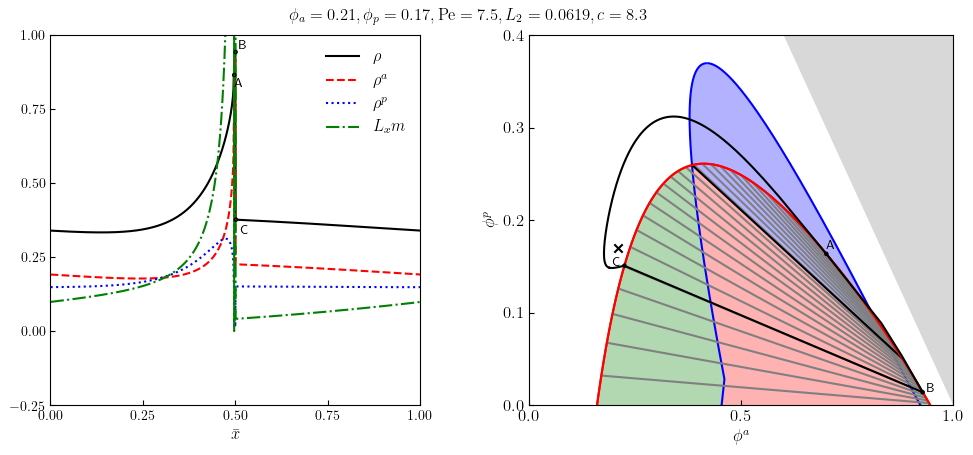

In [166]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f;c=c,point = ind-Nx÷2)

In [418]:
ϕaL, ϕaR, ϕL, ϕR = get_BC(2.1,v0;initial_Δ = 1e-6)
# ep = 1.0
# ϕaL, ϕaR, ϕL, ϕR = (1-ep).*(enda, enda, endphi,endphi) .+ep.*(ϕaL, ϕaR, ϕL, ϕR)
# get u0 pe
Lx, Nx, ϕa, ϕp, v0, ind = 100.0, 1024, 0.52, 0.2, 7.5, 739
param, ps = get_outer_param_4(Lx,Nx,ϕa,ϕp,v0; ind = ind)
pe = ps..., ϕaL, ϕaR, ϕL, ϕR

(1.0, 7.5, 1.0, 0.09765625, 1024, 100.0, 0.52, 0.2, 739, 0.5652034286750811, 0.8019614178337879, 0.7929540136548006, 0.9056959132541847)

In [422]:
@unpack name = param
filename = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/outer_sol/$(name)/[DT,v0,DR,Nx,ϕp,ind]=$([DT,v0,DR,Nx,ϕp,ind])_#4.jld2"

data = load(filename)
@unpack f, c = data
u = get_out_u(f,c,Lx);

d2(sum(f[:,1:2])/Nx), d2(sum(f)/Nx-sum(f[:,1:2])/Nx)



ArgumentError: ArgumentError: No file exists at given path: /store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/outer_sol/outer_sol_4/[DT,v0,DR,Nx,ϕp,ind]=[1.0, 7.5, 1.0, 1024.0, 0.2, 739.0]_#4.jld2

In [420]:
F = zeros(2*Nx+1)
ff_out_4_extra(F,u,pe)
F

2049-element Vector{Float64}:
 -0.0012451399252570994
 -0.0024909544407627493
 -0.0037374443421676062
 -0.004984610426454594
 -0.006232453493564272
 -0.007480974343818225
 -0.008730173780955752
 -0.009980052608599799
 -0.011230611634029941
 -0.01248185166480642
  ⋮
 -6.235060998692089
 -6.236761554572328
 -6.238464939303172
 -6.24017116571781
  2.988073610765696e-8
  1.385672021569917e-7
 -6.305131194928038e-8
 -0.10908825610389383
  0.05118315853262778

In [403]:
pe

(1.0, 7.5, 1.0, 0.09765625, 1024, 100.0, 0.52, 0.21, 739, 0.5652034286750811, 0.8019614178337879, 0.7929540136548006, 0.9056959132541847)

In [53]:
ϕa = 0.52 #collect(0.29:0.01:0.53)[input]; # 25 long
ϕp = 0.32 #collect(0.25:0.01:0.40)[input]; # 25 long
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, ϕa, ϕp, 7.5

ϕp_sweep = 0.33:(0.005):0.35;
# ϕp_sweep = 0.24:(-0.005):0.20;

# ϕa_sweep = 0.64:(0.01):0.72;
ϕa_sweep = 0.51:(-0.01):4.7;

sweep = (Lx, Nx, ϕa, ϕp, v0)
# param_sweep = [(Lx, Nx, ϕa, ϕp, v0) for ϕp in ϕp_sweep];
# param_sweep = [(Lx, Nx, ϕa, ϕp, v0) for ϕa in ϕa_sweep];
param_sweep = [(Lx, Nx, ϕa, ϕp, v0) for (ϕa,ϕp) in zip(ϕa_sweep,ϕp_sweep)];

f,u,c = load_out_3(sweep...)

for sweep in param_sweep
    local Lx, Nx, ϕa, ϕp, v0
    global f,u,c
        Lx, Nx, ϕa, ϕp, v0 = sweep
        param, p2 = get_outer_param_3(sweep...)
        f,u,c = solve_out_3(Lx,Nx,ϕa,ϕp,v0,u)
        err, avmag, c = check_u_3(u,p2);
        print("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err)")
end

ϕa,ϕp=(0.64,0.24): c=1.0187502385658493, avmag=3.7394752197116715e-7, err=4.442626599931998e-9ϕa,ϕp=(0.65,0.235): c=0.9360996637238217, avmag=-5.637851296924623e-16, err=3.134736914489622e-11ϕa,ϕp=(0.66,0.23): c=0.9072081686930061, avmag=8.998878031629687e-16, err=4.228206673673185e-11ϕa,ϕp=(0.67,0.225): c=0.8796121093858796, avmag=-6.613633252161577e-16, err=6.892064696728539e-11ϕa,ϕp=(0.68,0.22): c=0.8553971243760657, avmag=1.8431436932253575e-16, err=4.9627746356861735e-11ϕa,ϕp=(0.69,0.215): c=0.8342998687874348, avmag=-1.6263032587282567e-16, err=2.275302168897042e-11ϕa,ϕp=(0.7,0.21): c=0.8163178802728653, avmag=7.589415207398531e-17, err=7.674749724628782e-12ϕa,ϕp=(0.71,0.205): c=0.8007981318720856, avmag=1.734723475976807e-16, err=2.063682558173241e-12ϕa,ϕp=(0.72,0.2): c=0.7884334602846113, avmag=-1.6263032587282567e-16, err=4.728439861878542e-13